To start working with CSV data in Numpy and Pandas, we first need to start by importing the libraries into our Python environment.
By convention, Numpy is aslways imported with np as its alias name and Pandas is always imported with pd as its alias name.

We also need to import the Pyplot methods from Matplotlib library along with the seaborn library to create Data Visualizations. But before importing the matplotlib library, we need to run a magic command "%matplotlib inline" for being able to display the plots inline.

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We use the pd.read_csv(filename,delimiter) to read the csv file as a Pandas Dataframe. The Pandas Dataframe is a 2-Dimensional data structure i.e data is aligned in a tabular fashion in rows and columns. 

In [11]:
births = pd.read_csv("births.csv")

We use the .shape attribute with Pandas dataframe which returns a tuple representing the dimensions of each axis of the dataframe object in the format (rows,columns). We also use the type() function to inspect the dataframe object. There is a special attribute in Pandas "dtype" which helps us inspect the data type of each column.

Alternatively, we can even use the dataframe.info() method which gives us an overview of all the dtypes used in our dataframe, along with its shape and some extra information.

In [12]:
# type(births)
# births.shape
# births.dtypes
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 5 columns):
year             3652 non-null int64
month            3652 non-null int64
date_of_month    3652 non-null int64
day_of_week      3652 non-null int64
births           3652 non-null int64
dtypes: int64(5)
memory usage: 142.7 KB


In [13]:
births.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


From the output provided by the info() method on the dataframe and the first few rows of the dataframe using the dataframe.head() method, we observe that the dataframe has 3652 rows and 5 columns, the data type of each of the column is int and there are no null or NaN values in the entire dataset.

We now convert the year column from int64 to object dtype as well as replace the values in the month and day_of_week column appropriately

In [14]:
# Converting the year column into object dtype using the astype() function
births["year"] = births["year"].astype(str)

In [15]:
# Creating a summary dataframe based on the value in the year column. This basically includes considering unique values in the year column
# The groupby() function Splits the data based on a criteria, Applying a function to each group independently and Combine the results into a datastructure
# The as_index parameter makes sure the column used as a criteria does not appear as index as the default behaviour is to set that as an index column
births_per_year = births.groupby("year", as_index=False)["births"].sum()

# Converting the value in births column to millions and renaming the column name for simplicity and readability
births_per_year["births"] = births_per_year["births"] / 1000000

# We specify the column names to be renamed in the form of a dictionary (key=current label & value=new label) with axis parameter to specify the axis and inplace=True instead of assignment
births_per_year.rename({"births":"births_in_millions"}, axis=1, inplace=True)

Tables neatly organizes values into rows and columns, we can easily look up specific values at the intersection of a row value and a column value. Unfortunately it's very difficult to explore a dataset to uncover patterns when it's represented as a table, especially when the dataset contains many values. 
Let's create some visual representation of the data to further explore the dataset and uncover patterns.

We'll begin with creating a line chart as well as KDE plot for the count of births per year

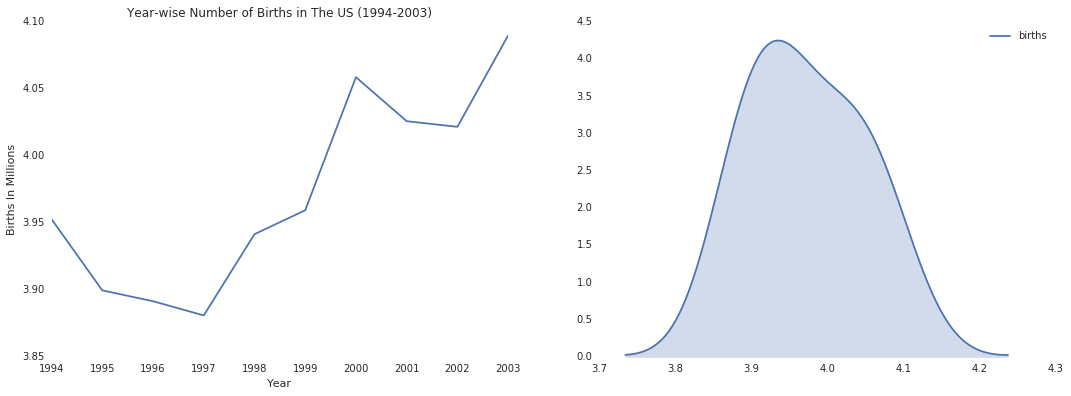

In [16]:
# Setting the style for the plot using the sns.set_style() method
sns.set_style("white")

# Creating a figure object and setting the size of the figure
fig = plt.figure(figsize=(18,6))

# Creating an axes object and adding a subplot in the figure container.
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Plotting a line chart to explore the trend in births per year and analyse if its increasing or decreasing. We can decorate the plot by adding labels and title for the line chart
ax1.plot(births_per_year["year"],births_per_year["births_in_millions"])

ax1.set_title("Year-wise Number of Births in The US (1994-2003)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Births In Millions")

for key,value in ax1.spines.items():
    ax1.spines[key].set_visible(False)

ax1.tick_params(bottom="off", left="off", top="off", right="off")
ax1.set_xticklabels(births_per_year["year"])

# Plotting a KDE to explore the estimate the density of births per year
ax2 = sns.kdeplot(births_per_year["births_in_millions"], shade=True, label="births")
sns.despine(bottom=True, left=True)

# Displaying the plot using the show() method
plt.show()

We will analyze the dataset for exploring patterns considering the monthl wise births in the US over the period 1994-2003

In [17]:
# Creating a summary dataframe based on the value in the year and the month column. This basically includes considering unique combination of values in the year and month column
births_per_month = births.groupby(["year","month"], as_index=False)["births"].sum()

births_per_month["births"] = births_per_month["births"] / 1000000

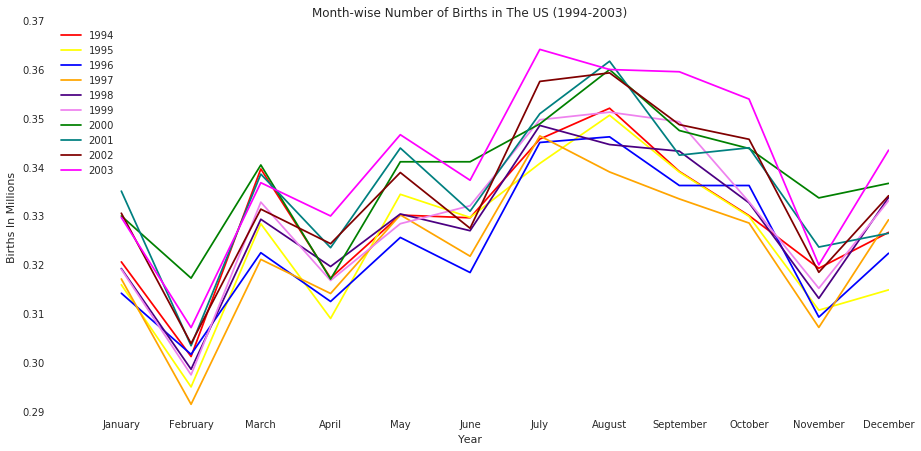

In [18]:
# Creating a figure object and setting the size of the figure
fig,ax = plt.subplots(figsize=(15,7))

# Creating a list with 10 color values for plotting line charts with different colors for each year between 1994 & 2003
color = ["red","yellow","blue","orange","indigo","violet","green","teal","maroon","magenta"]

# Creating line charts for individual year based on the number of births per month
for i in range(len(births_per_month["year"].unique())):
    start_index = i*12
    end_index = (i+1)*12
    temp = births_per_month[start_index:end_index]
    plt.plot(temp["month"],temp["births"], c=color[i], label=temp["year"].unique()[0])

# Decorating the line chart by adding title, x-axis and y-axis label, improving the ink-ratio, adding legend and xtick values
plt.legend(loc="upper left")

plt.title("Month-wise Number of Births in The US (1994-2003)")
plt.xlabel("Year")
plt.ylabel("Births In Millions")

for key,value in ax.spines.items():
    ax.spines[key].set_visible(False)

month = ["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.xticks(np.arange(1,13), month)

plt.show()